In [35]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [36]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70296 files belonging to 38 classes.


In [37]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17574 files belonging to 38 classes.


In [38]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [39]:
model = tf.keras.models.Sequential()

In [40]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[129. 119. 127.]
   [129. 119. 127.]
   [130. 120. 128.]
   ...
   [122. 111. 115.]
   [120. 109. 113.]
   [118. 107. 111.]]

  [[128. 118. 126.]
   [128. 118. 126.]
   [129. 119. 127.]
   ...
   [121. 110. 114.]
   [118. 107. 111.]
   [116. 105. 109.]]

  [[128. 118. 126.]
   [128. 118. 126.]
   [129. 119. 127.]
   ...
   [120. 109. 113.]
   [117. 106. 110.]
   [115. 104. 108.]]

  ...

  [[168. 159. 164.]
   [170. 161. 166.]
   [169. 160. 165.]
   ...
   [168. 158. 166.]
   [182. 172. 180.]
   [153. 143. 151.]]

  [[163. 154. 159.]
   [166. 157. 162.]
   [166. 157. 162.]
   ...
   [153. 143. 151.]
   [170. 160. 168.]
   [160. 150. 158.]]

  [[165. 156. 161.]
   [168. 159. 164.]
   [169. 160. 165.]
   ...
   [150. 140. 148.]
   [156. 146. 154.]
   [157. 147. 155.]]]


 [[[  0.   0.   0.]
   [  0.   0.   0.]
   [  0.   0.   0.]
   ...
   [  0.   0.   0.]
   [  0.   0.   0.]
   [  0.   0.   0.]]

  [[  0.   0.   0.]
   [  0.   0.   0.]
   [  0.   0.   0.]
   ...
   [  0.  

In [41]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [42]:
model = Sequential()

In [43]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=(256,256,3)))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))


In [44]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [45]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [46]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [47]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [48]:
model.add(Dropout(0.25))

In [49]:
model.add(Flatten())

In [50]:
model.add(Dense(units=1500,activation='relu'))

In [51]:
model.add(Dropout(0.4))

In [52]:
model.add(Dense(units=38,activation='softmax'))

In [53]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [54]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)              │ (None, 256, 256, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 254, 254, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 127, 127, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 125, 125, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 62, 62, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 60, 60, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 30, 30, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 28, 28, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 14, 14, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 12, 12, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1500)           │    27,649,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,418,762 (123.67 MB)

 Trainable params: 32,418,762 (123.67 MB)

 Non-trainable params: 0 (0.00 B)

In [55]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 7070s 3s/step - accuracy: 0.5420 - loss: 1.6142 - val_accuracy: 0.8651 - val_loss: 0.4293
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 7036s 3s/step - accuracy: 0.8931 - loss: 0.3422 - val_accuracy: 0.9442 - val_loss: 0.1704
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 4438s 2s/step - accuracy: 0.9380 - loss: 0.1888 - val_accuracy: 0.9441 - val_loss: 0.1749
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3285s 1s/step - accuracy: 0.9582 - loss: 0.1283 - val_accuracy: 0.9626 - val_loss: 0.1201
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3320s 2s/step - accuracy: 0.9689 - loss: 0.0928 - val_accuracy: 0.9675 - val_loss: 0.1093
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3333s 2s/step - accuracy: 0.9771 - loss: 0.0702 - val_accuracy: 0.9630 - val_loss: 0.1282
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3258s 1s/step - accuracy: 0.9806 - loss: 0.0562 - val_accuracy: 0.9592 - val_loss: 0.1445
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3167s 1s/step - accuracy: 0.9828 -

In [56]:
train_loss,train_acc = model.evaluate(training_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 784s 357ms/step - accuracy: 0.9942 - loss: 0.0180


In [57]:
print(train_loss,train_acc)

0.015705475583672523 0.9948360919952393


In [58]:
val_loss,val_acc = model.evaluate(validation_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 195s 354ms/step - accuracy: 0.9754 - loss: 0.0911


In [59]:
print(val_loss,val_acc)

0.0960070863366127 0.971947193145752


In [60]:
model.save("Trained_model.keras")

In [61]:
training_history.history

{'accuracy': [0.7216911315917969,
  0.9101797938346863,
  0.9464691877365112,
  0.9616905450820923,
  0.9722175002098083,
  0.9770541787147522,
  0.9814783334732056,
  0.9838539958000183,
  0.9863861203193665,
  0.98836350440979],
 'loss': [0.9385653734207153,
  0.2846653163433075,
  0.16292640566825867,
  0.11717358231544495,
  0.0850735455751419,
  0.06916303187608719,
  0.05475939065217972,
  0.05001828446984291,
  0.04145778343081474,
  0.036559827625751495],
 'val_accuracy': [0.8650847673416138,
  0.9441788792610168,
  0.9440650939941406,
  0.9625583291053772,
  0.9674519300460815,
  0.9630135297775269,
  0.9592010974884033,
  0.9725162386894226,
  0.9754751324653625,
  0.971947193145752],
 'val_loss': [0.42926111817359924,
  0.17035898566246033,
  0.1749032735824585,
  0.12005564570426941,
  0.10929931700229645,
  0.12815053761005402,
  0.14453499019145966,
  0.09503697603940964,
  0.08663395047187805,
  0.09600704908370972]}

In [62]:
import json
with open("training_hist1.json","w") as f:
    json.dump(training_history.history,f)

In [63]:
training_history.history['val_accuracy']

[0.8650847673416138,
 0.9441788792610168,
 0.9440650939941406,
 0.9625583291053772,
 0.9674519300460815,
 0.9630135297775269,
 0.9592010974884033,
 0.9725162386894226,
 0.9754751324653625,
 0.971947193145752]

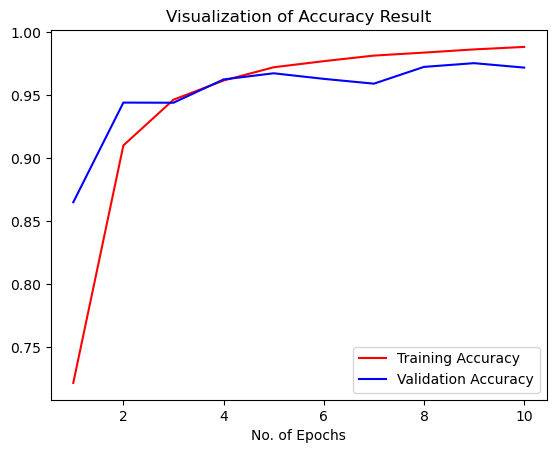

In [64]:
epochs = range(1, len(training_history.history['accuracy']) + 1)
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

In [65]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [68]:
test_set =  tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
) 

Found 17574 files belonging to 38 classes.


In [69]:
y_pred = model.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

550/550 ━━━━━━━━━━━━━━━━━━━━ 191s 348ms/step


In [70]:
predicted_categories

<tf.Tensor: shape=(17574,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [71]:
true_categories = tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(17574, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [72]:
Y_true = tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(17574,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [73]:
from sklearn.metrics import classification_report,confusion_matrix

In [74]:
print(classification_report(Y_true,predicted_categories,target_names = class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.98      0.98      0.98       504
                                 Apple___Black_rot       0.99      0.99      0.99       497
                          Apple___Cedar_apple_rust       0.97      1.00      0.98       440
                                   Apple___healthy       0.98      0.95      0.97       502
                               Blueberry___healthy       0.99      0.96      0.98       454
          Cherry_(including_sour)___Powdery_mildew       0.97      1.00      0.98       421
                 Cherry_(including_sour)___healthy       0.96      1.00      0.98       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.87      0.95      0.91       410
                       Corn_(maize)___Common_rust_       0.99      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.97      0.88      0.

In [75]:
cm = confusion_matrix(Y_true, predicted_categories)
cm.shape

(38, 38)

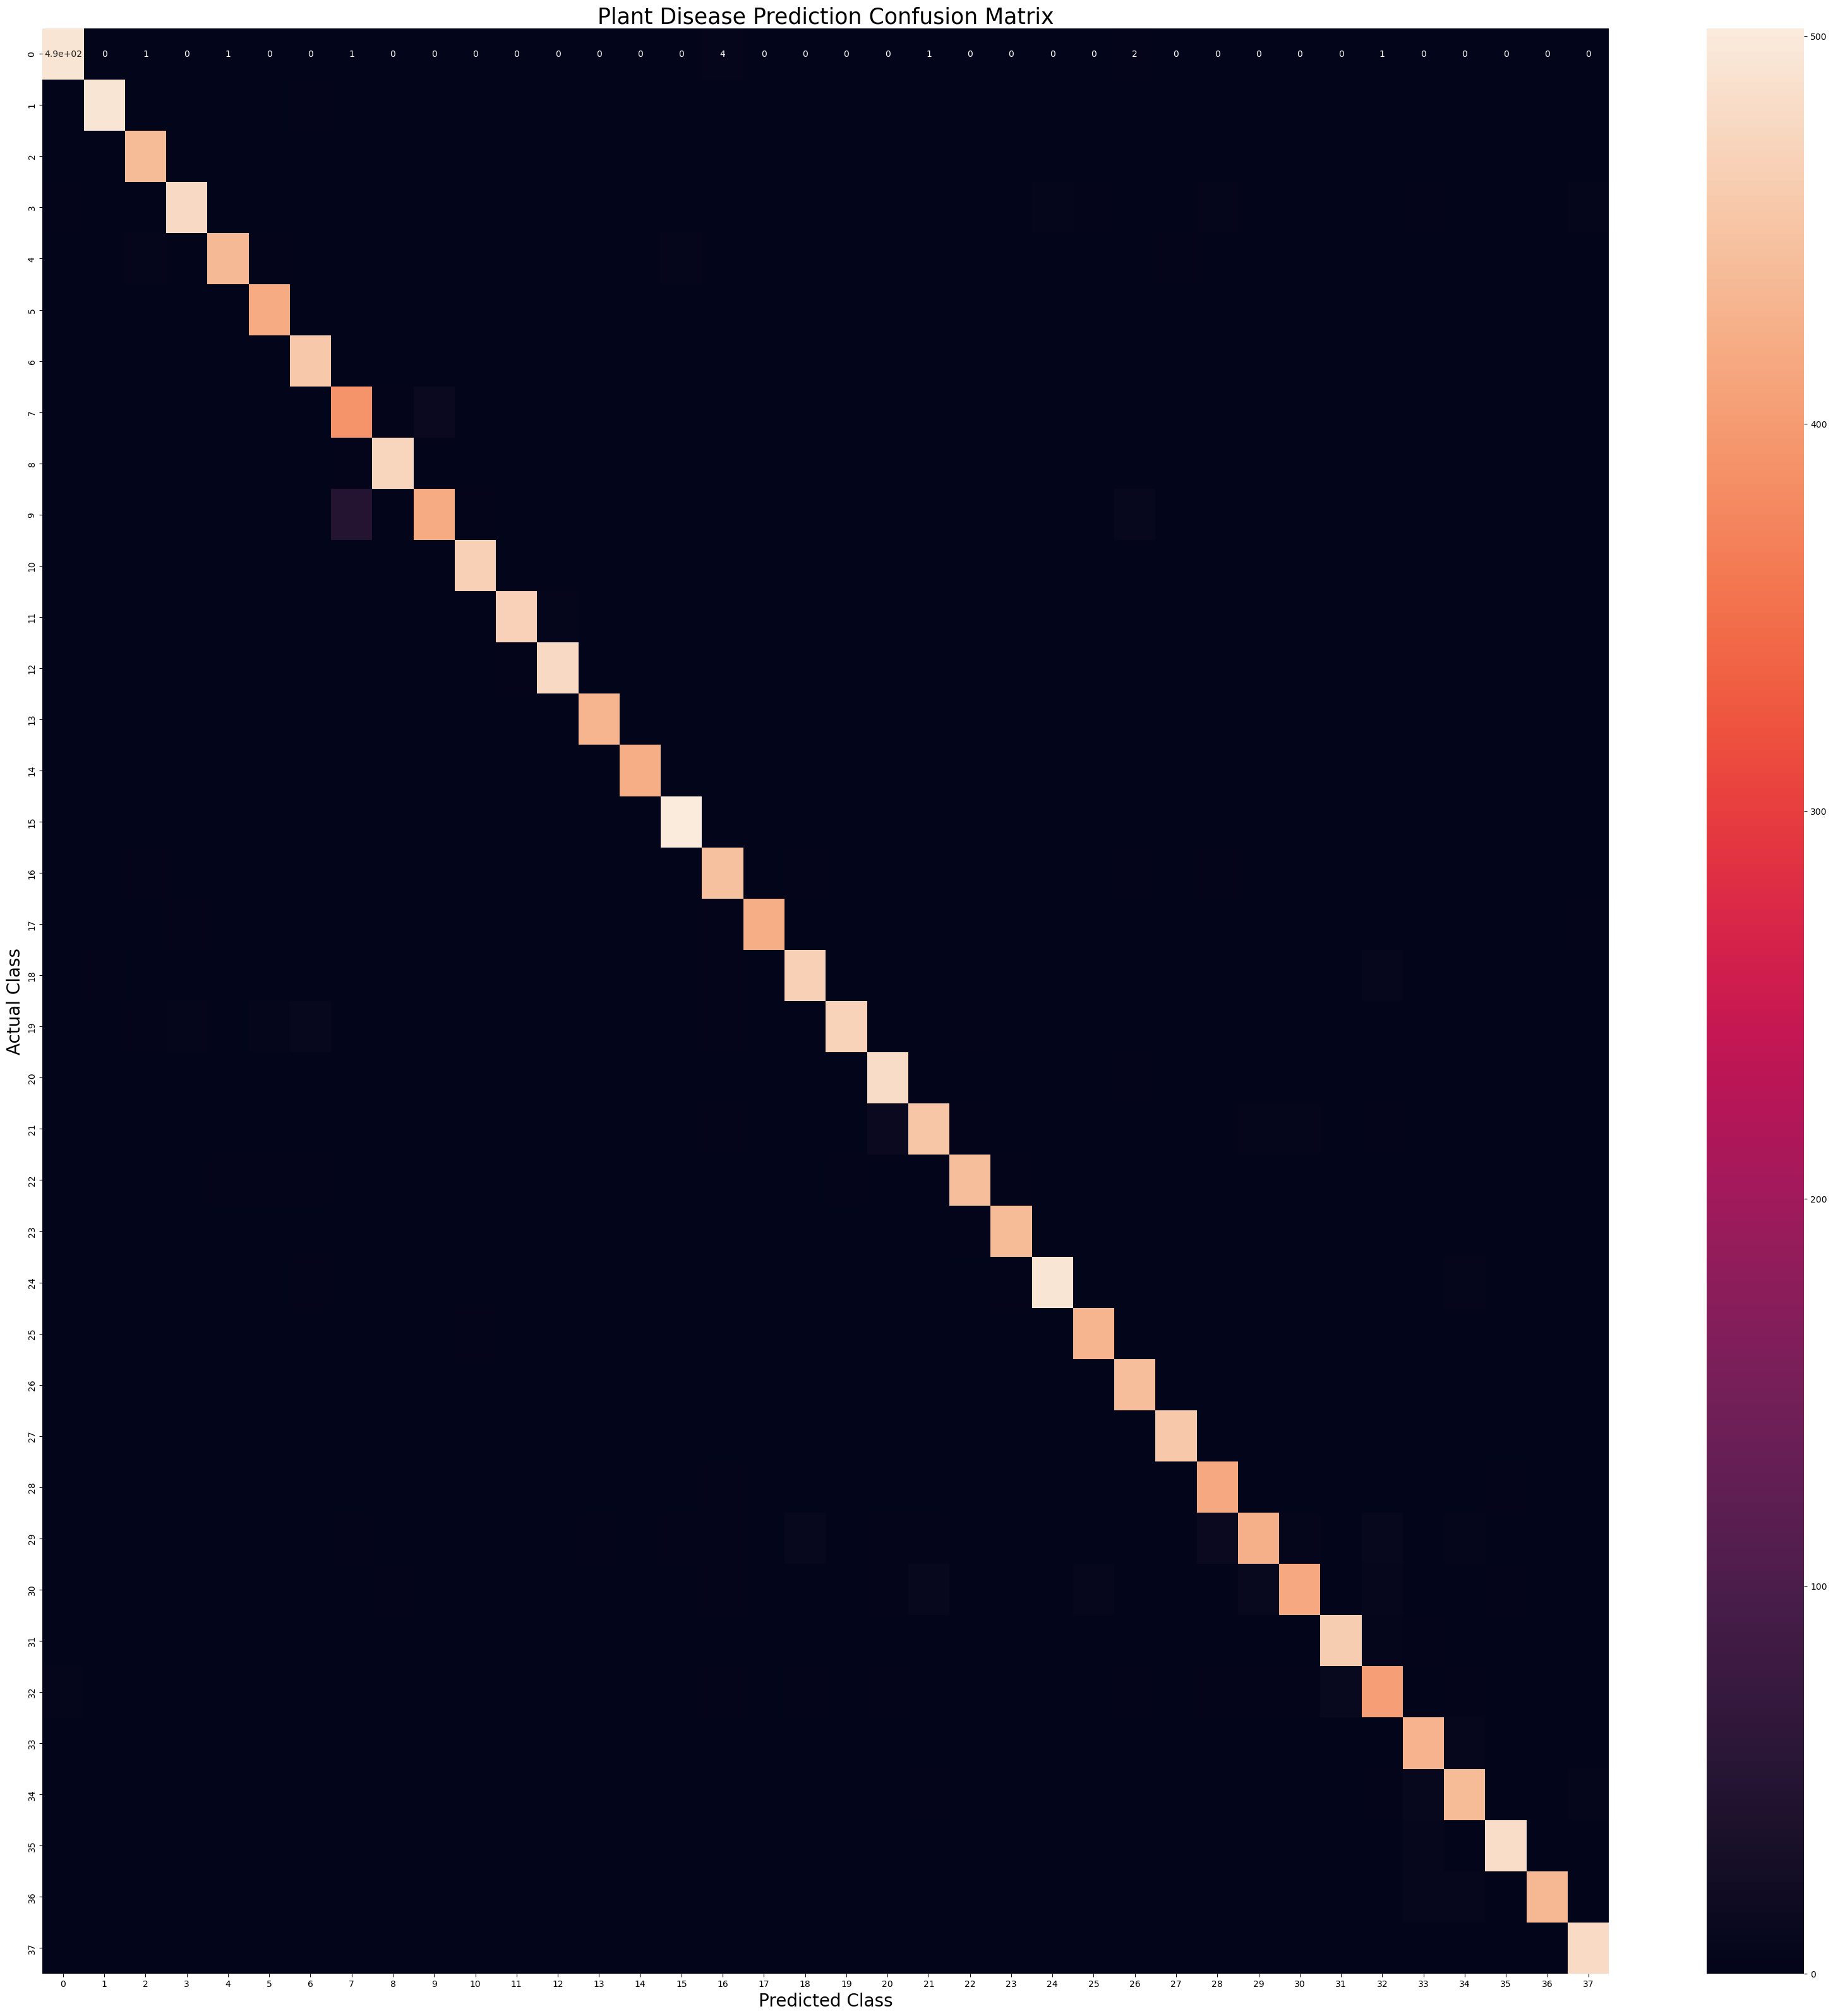

In [76]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()